# Import Packages

In [40]:
# General Imports
import sys
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

# Preprocessing Imports
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, SVMSMOTE, KMeansSMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler

# Modeling Imports
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

# Evaluation Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, roc_auc_score, roc_curve, auc



# Map src directory
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../."))
print("Root Directory: ", root_dir)
src_dir = os.path.join(root_dir,"src")
print("Src Directory: ", src_dir)
sys.path.append(src_dir)
data_dir = os.path.join(root_dir,"data")
print("Data Directory: ", data_dir)

Root Directory:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder
Src Directory:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/src
Data Directory:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/data


In [6]:
venv_nltk_data_path = os.path.join(root_dir,'.venv/lib/nltk_data')
print("venv Data Path: ",venv_nltk_data_path)

try:
    os.mkdir(venv_nltk_data_path)
    try:
        nltk.download('words', download_dir=venv_nltk_data_path)
        nltk.download('punkt_tab', download_dir=venv_nltk_data_path) # use punkt_tab instead of punkt to avoid pickling security vulnerability
        nltk.download('stopwords',download_dir=venv_nltk_data_path)
        nltk.data.path.clear()
        nltk.data.path.append(venv_nltk_data_path)
    except:
        print("Error: Unable to download words")
except:
    print("Unable to create directory - it might already exist")
    pass


venv Data Path:  /media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/nltk_data
Unable to create directory - it might already exist


In [7]:
def concatenate_texts(row):
    cad_text = row['CAD_TEXT'] if pd.notna(row['CAD_TEXT']) else ""
    oh_text = row['OH1_TEXT'] if pd.notna(row['OH1_TEXT']) else ""
    
    if oh_text:  # If 'OH_TEXT' is not an empty string
        return cad_text + "POLICE NARRATIVE \n\n " + oh_text
    else:
        return cad_text  # If 'OH_TEXT' is empty, return only 'CAD_TEXT'

training_df = pd.read_csv(os.path.join(data_dir, "processed", "training_df.csv"))
training_df['concatenated_text'] = training_df.apply(concatenate_texts, axis=1)


In [41]:
def evaluate_confusion_matrix(y_true, model_best, X_test):
    y_train_pred = model_best.predict(X_test)    
    print("F1 score: ", f1_score(y_true, y_train_pred, average='weighted'))
    print("ROC AUC score: ", roc_auc_score(y_true, y_train_pred, average='weighted'))
    print(classification_report(y_true, y_train_pred))
    conf_matrix = confusion_matrix(y_true, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

In [9]:
# Remove unwanted text

unwanted_text1 = "THIS DOCUMENT WAS CREATED BY AN APPLICATION THAT ISN’T LICENSED TO USE NOVAPDF. PURCHASE A LICENSE TO GENERATE PDF FILES WITHOUT THIS NOTICE."
training_df['concatenated_text'] = training_df['concatenated_text'].apply(lambda text: text.replace(unwanted_text1, ''))
training_df['concatenated_text'] = training_df['concatenated_text'].apply(lambda text: re.sub(r"INCIDENT REPORT PRINT .*?\n\n", '', text, flags=re.DOTALL))
training_df['concatenated_text'] = training_df['concatenated_text'].apply(lambda text: re.sub(r"REDACTION DATE.*?\n\n", '', text, flags=re.DOTALL))


In [10]:
# import sys
# del sys.modules['cc']

In [11]:
import complete_collision as cc

In [12]:
models = [
    ('LinearSVC', LinearSVC()), 
    ('RF', RandomForestClassifier(n_estimators=100))
]

class_balancers = [
    None,
    RandomOverSampler(random_state=123), 
    SMOTE(random_state=123), 
    ADASYN(random_state=123), 
    SVMSMOTE(random_state=123)
]

/tmp/ipykernel_624935/1183479050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_df['CRASH_SEVERE_IND'] = training_df['CRASH_SEVERITY_CD'].apply(


Dataset has been split into training and testing sets.
Number of rows in total: 569
Number of rows in X_train: 455
Number of rows in X_test: 114
Number of Features/Terms in vector): 387
Min value: 0.0
Max value: 0.7746470435184668
Percentiles: [0.         0.         0.         0.11559978]
Explained Variance: 95.63%
Number of Components:  179


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/src/complete_collision.py:670: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balancer_eval = pd.concat(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

,Model,Balancer,Confusion Matrix,Macro Avg Precision,Macro Avg Recall,Macro Avg F1
0,LinearSVC,None,"[[87, 4], [15, 8]]",0.759804,0.651935,0.679349
1,RF,None,"[[90, 1], [23, 0]]",0.398230,0.494505,0.441176
2,LinearSVC,RandomOverSampler(random_state=123),"[[79, 12], [11, 12]]",0.688889,0.694935,0.691783
3,RF,RandomOverSampler(random_state=123),"[[91, 0], [23, 0]]",0.399123,0.500000,0.443902
4,LinearSVC,SMOTE(random_state=123),"[[83, 8], [12, 11]]",0.726316,0.695174,0.708141
5,RF,SMOTE(random_state=123),"[[90, 1], [23, 0]]",0.398230,0.494505,0.441176
6,LinearSVC,ADASYN(random_state=123),"[[81, 10], [12, 11]]",0.697389,0.684185,0.690217
7,RF,ADASYN(random_state=123),"[[90, 1], [23, 0]]",0.398230,0.494505,0.441176
8,LinearSVC,SVMSMOTE(random_state=123),"[[84, 7], [11, 12]]",0.757895,0.722408,0.737327
9,RF,SVMSMOTE(random_state=123),"[[91, 0], [23, 0]]",0.399123,0.500000,0.443902


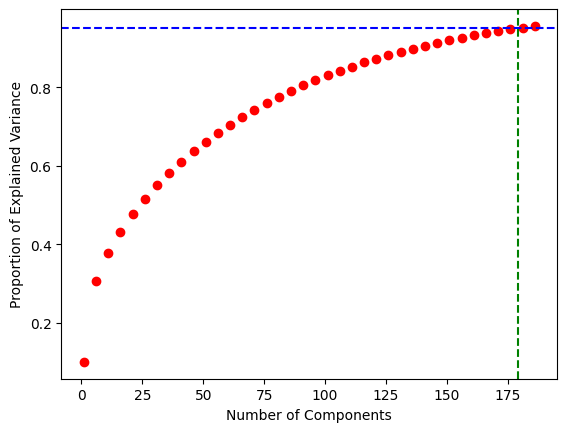

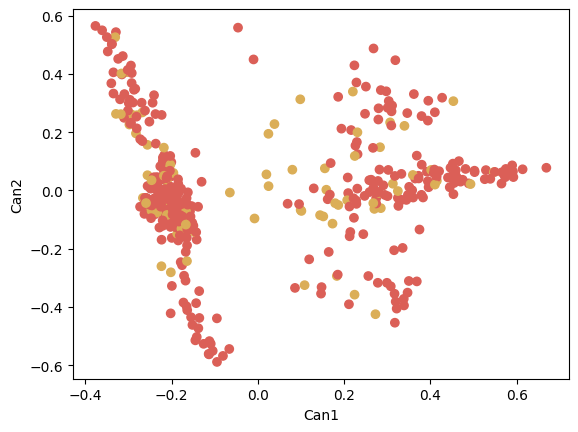

In [13]:
severity_df = training_df[training_df['CRASH_SEVERITY_CD'].notnull() & training_df['CRASH_SEVERITY_CD'] !=0]
severity_df['CRASH_SEVERE_IND'] = training_df['CRASH_SEVERITY_CD'].apply(
    lambda x: 1 if x in [1, 2] else 0
)
preprocess_severity = cc.PreprocessGCAT(df=severity_df, 
                                               text_column='concatenated_text', 
                                               label_column='CRASH_SEVERE_IND',
                                               test_size=0.2, 
                                               norm = 'l2', 
                                               vocabulary=None, 
                                               min_df=0.05, 
                                               max_df=0.9, 
                                               max_features=500
                                               ) 
preprocess_severity.fit_and_evaluate_tfidf_vector()
dtm = preprocess_severity.create_doc_term_matrix()
explained_variance, components = preprocess_severity.pca_analysis(dtm)
balancer_eval_severity = preprocess_severity.evaluate_balancers(models, class_balancers, n_components=components)
balancer_eval_severity

In [14]:
pipe_severity = Pipeline([
    ('vec', preprocess_severity.vec),
    ('pca', PCA(n_components=components)), 
    ('classifier', LinearSVC(random_state=123))
])

parameters = [
    {
        'classifier__C': [10, 25, 100],
        'classifier__loss': ['hinge', 'squared_hinge'],
    }
]

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_search_severity = GridSearchCV(pipe_severity, parameters, cv=kf, scoring='f1', verbose=1)
grid_search_severity.fit(preprocess_severity.X_train, preprocess_severity.y_train)


print("Best parameters:", grid_search_severity.best_params_)
print("Best cross-validation score:", grid_search_severity.best_score_)
severity_best = grid_search_severity.best_estimator_



Fitting 10 folds for each of 6 candidates, totalling 60 fits


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Rec

Best parameters: {'classifier__C': 100, 'classifier__loss': 'hinge'}
Best cross-validation score: 0.41255562033425813


ValueError: Found input variables with inconsistent numbers of samples: [114, 455]

Injury Severity Label Validation
F1 score:  0.7928435167113258
ROC AUC score:  0.6624462494027711
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        91
           1       0.50      0.43      0.47        23

    accuracy                           0.80       114
   macro avg       0.68      0.66      0.67       114
weighted avg       0.79      0.80      0.79       114



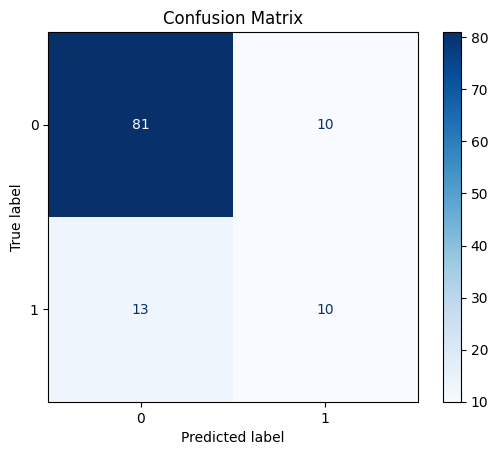

In [49]:
print("Injury Severity Label Validation")
evaluate_confusion_matrix(preprocess_severity.y_test, severity_best, preprocess_severity.X_test)

# Unit 1 Is Vehicle Indicator

/tmp/ipykernel_624935/3224057202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh_df['U1_IS_VEHICLE'] = veh_df['U1_TYPE_OF_UNIT_CD'].replace({


Dataset has been split into training and testing sets.
Number of rows in total: 569
Number of rows in X_train: 455
Number of rows in X_test: 114
Number of Features/Terms in vector): 387
Min value: 0.0
Max value: 0.7746470435184668
Percentiles: [0.         0.         0.         0.11559978]
Explained Variance: 95.63%
Number of Components:  179


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/src/complete_collision.py:670: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balancer_eval = pd.concat(


,Model,Balancer,Confusion Matrix,Macro Avg Precision,Macro Avg Recall,Macro Avg F1
0,LinearSVC,None,"[[9, 24], [9, 72]]",0.625000,0.580808,0.583250
1,RF,None,"[[1, 32], [0, 81]]",0.858407,0.515152,0.446938
2,LinearSVC,RandomOverSampler(random_state=123),"[[17, 16], [28, 53]]",0.572947,0.584736,0.571282
3,RF,RandomOverSampler(random_state=123),"[[1, 32], [2, 79]]",0.522523,0.502806,0.439236
4,LinearSVC,SMOTE(random_state=123),"[[19, 14], [26, 55]]",0.609662,0.627385,0.610256
5,RF,SMOTE(random_state=123),"[[2, 31], [5, 76]]",0.497997,0.499439,0.454255
6,LinearSVC,ADASYN(random_state=123),"[[17, 16], [24, 57]]",0.597728,0.609428,0.599860
7,RF,ADASYN(random_state=123),"[[1, 32], [3, 78]]",0.479545,0.496633,0.435404
8,LinearSVC,SVMSMOTE(random_state=123),"[[14, 19], [25, 56]]",0.552821,0.557800,0.553419
9,RF,SVMSMOTE(random_state=123),"[[1, 32], [3, 78]]",0.479545,0.496633,0.435404


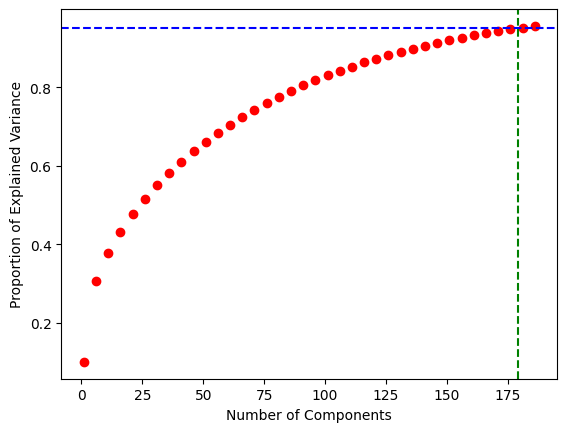

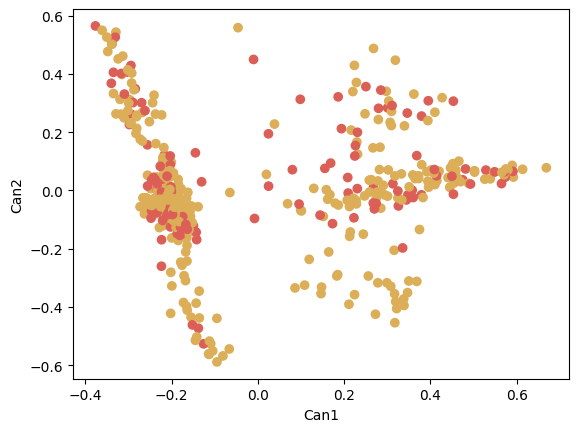

In [26]:
veh_df = training_df[training_df['U1_TYPE_OF_UNIT_CD'].notnull() & training_df['U1_TYPE_OF_UNIT_CD'] !=0]
veh_df['U1_IS_VEHICLE'] = veh_df['U1_TYPE_OF_UNIT_CD'].replace({
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    7: 1,
    8: 1,
    9: 1,
    10: 1,
    11: 1,
    12: 1,
    13: 1,
    14: 1,
    15: 1,
    16: 1,
    17: 1,
    18: 1,
    19: 1,
    20: 1,
    21: 1,
    22: 1,
    23: 0,
    24: 0,
    25: 1,
    26: 0,
    99: 1,  
})

preprocess_u1_is_veh = cc.PreprocessGCAT(df=veh_df, 
                                               text_column='concatenated_text', 
                                               label_column='U1_IS_VEHICLE',
                                               test_size=0.2, 
                                               norm = 'l2', 
                                               vocabulary=None, 
                                               min_df=0.05, 
                                               max_df=0.9, 
                                               max_features=500
                                               ) 
preprocess_u1_is_veh.fit_and_evaluate_tfidf_vector()
dtm = preprocess_u1_is_veh.create_doc_term_matrix()
explained_variance, components = preprocess_u1_is_veh.pca_analysis(dtm)
balancer_eval_u1_is_veh = preprocess_u1_is_veh.evaluate_balancers(models, class_balancers, n_components=components)
balancer_eval_u1_is_veh

Fitting 10 folds for each of 6 candidates, totalling 60 fits


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Rec

Best parameters: {'classifier__C': 10, 'classifier__loss': 'hinge'}
Best cross-validation score: 0.7354288319951517
F1 score:  0.384818254787295


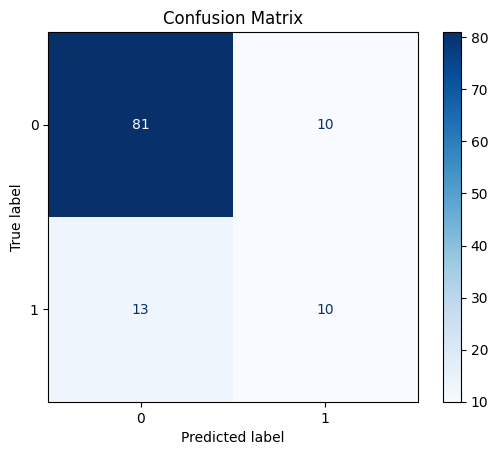

In [27]:
pipe_preprocess_u1_is_veh = Pipeline([
    ('vec', preprocess_u1_is_veh.vec),
    ('class_balancer', SVMSMOTE(random_state=123)),
    ('pca', PCA(n_components=components)), 
    ('classifier', LinearSVC(random_state=123))
])

parameters = [
    {
        'classifier__C': [10, 25, 100],
        'classifier__loss': ['hinge', 'squared_hinge'],
    }
]

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_search_u1_is_veh = GridSearchCV(pipe_preprocess_u1_is_veh, parameters, cv=kf, scoring='f1', verbose=1)
grid_search_u1_is_veh.fit(preprocess_u1_is_veh.X_train, preprocess_u1_is_veh.y_train)

print("Best parameters:", grid_search_u1_is_veh.best_params_)
print("Best cross-validation score:", grid_search_u1_is_veh.best_score_)
u1_is_veh_best = grid_search_u1_is_veh.best_estimator_


F1 score:  0.6172987616099072
ROC AUC score:  0.5398428731762065
              precision    recall  f1-score   support

         0.0       0.34      0.36      0.35        33
         1.0       0.73      0.72      0.72        81

    accuracy                           0.61       114
   macro avg       0.54      0.54      0.54       114
weighted avg       0.62      0.61      0.62       114



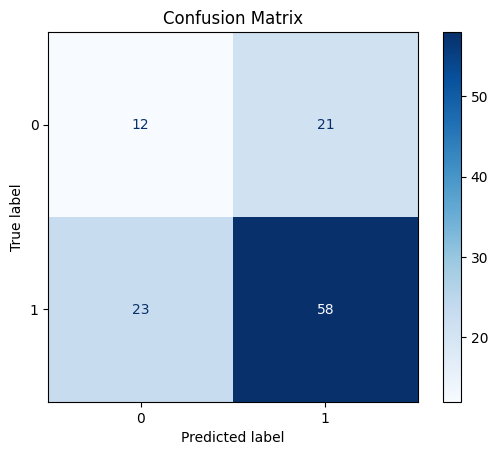

In [43]:
print("Unit 1 is Vehicle Label Validation")
evaluate_confusion_matrix(preprocess_u1_is_veh.y_test, u1_is_veh_best, preprocess_u1_is_veh.X_test)

# Unit 1 Turn Indicator

/tmp/ipykernel_624935/514546920.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  turn_df['U1_TURN_RECODED'] = turn_df['U1_TURN_CD'].replace({
/tmp/ipykernel_624935/514546920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turn_df['U1_TURN_RECODED'] = turn_df['U1_TURN_CD'].replace({
/tmp/ipykernel_624935/514546920.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

Dataset has been split into training and testing sets.
Number of rows in total: 569
Number of rows in X_train: 455
Number of rows in X_test: 114
Number of Features/Terms in vector): 387
Min value: 0.0
Max value: 0.7746470435184668
Percentiles: [0.         0.         0.         0.11559978]
Explained Variance: 95.63%
Number of Components:  179


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/src/complete_collision.py:670: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balancer_eval = pd.concat(


,Model,Balancer,Confusion Matrix,Macro Avg Precision,Macro Avg Recall,Macro Avg F1
0,LinearSVC,None,"[[55, 7], [33, 19]]",0.677885,0.626241,0.610256
1,RF,None,"[[58, 4], [49, 3]]",0.485314,0.496588,0.394043
2,LinearSVC,RandomOverSampler(random_state=123),"[[46, 16], [29, 23]]",0.601538,0.592122,0.588514
3,RF,RandomOverSampler(random_state=123),"[[57, 5], [47, 5]]",0.524038,0.507754,0.424019
4,LinearSVC,SMOTE(random_state=123),"[[45, 17], [26, 26]]",0.619227,0.612903,0.612030
5,RF,SMOTE(random_state=123),"[[53, 9], [42, 10]]",0.542105,0.523573,0.478425
6,LinearSVC,ADASYN(random_state=123),"[[44, 18], [27, 25]]",0.600557,0.595223,0.593985
7,RF,ADASYN(random_state=123),"[[53, 9], [39, 13]]",0.583498,0.552419,0.519832
8,LinearSVC,SVMSMOTE(random_state=123),"[[47, 15], [28, 24]]",0.621026,0.609801,0.606802
9,RF,SVMSMOTE(random_state=123),"[[57, 5], [43, 9]]",0.606429,0.546216,0.488215


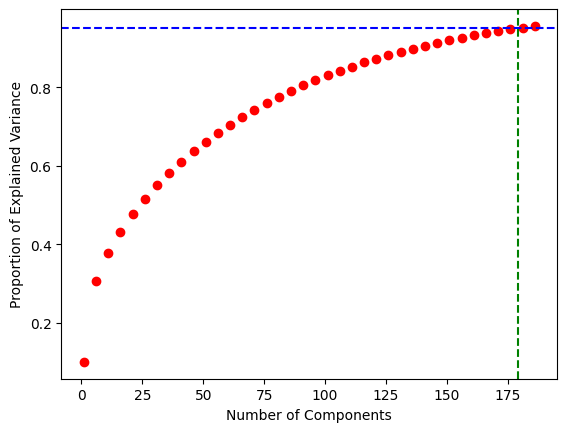

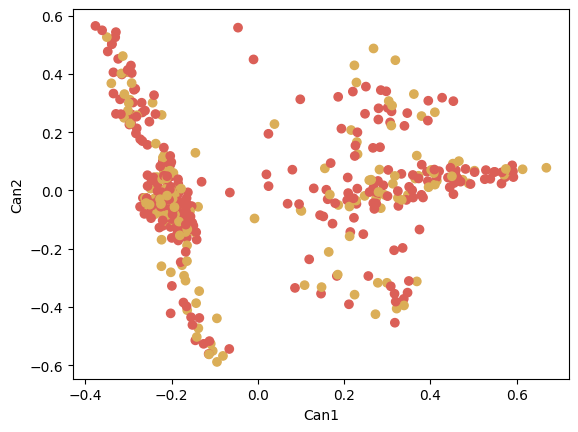

In [28]:
turn_df = training_df[training_df['U1_TURN_CD'].notnull() & training_df['U1_TURN_CD'] !=0]
turn_df['U1_TURN_RECODED'] = turn_df['U1_TURN_CD'].replace({
    'NT': 0,
    'LT': 1,
    'UT': 1,
    'RT': 1
})
turn_df['U2_TURN_RECODED'] = turn_df['U2_TURN_CD'].replace({
    'NT': 0,
    'LT': 1,
    'UT': 1,
    'RT': 1
})
turn_df['TURN_CD'] = turn_df[['U1_TURN_RECODED', 'U2_TURN_RECODED']].max(axis=1).astype(int)

preprocess_turn = cc.PreprocessGCAT(df=turn_df, 
                                               text_column='concatenated_text', 
                                               label_column='TURN_CD',
                                               test_size=0.2, 
                                               norm = 'l2', 
                                               vocabulary=None, 
                                               min_df=0.05, 
                                               max_df=0.9, 
                                               max_features=500
                                               ) 
preprocess_turn.fit_and_evaluate_tfidf_vector()
dtm = preprocess_turn.create_doc_term_matrix()
explained_variance, components = preprocess_turn.pca_analysis(dtm)
balancer_eval_intersection = preprocess_turn.evaluate_balancers(models, class_balancers, n_components=components)
balancer_eval_intersection

In [30]:
pipe_turn = Pipeline([
    ('vec', preprocess_turn.vec),
    ('class_balancer', SVMSMOTE(random_state=123)),
    ('pca', PCA(n_components=components)), 
    ('classifier', LinearSVC(random_state=123))
])

parameters = [
    {
        'classifier__C': [10, 25, 100],
        'classifier__loss': ['hinge', 'squared_hinge'],
    }
]

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_search_turn = GridSearchCV(pipe_turn, parameters, cv=kf, scoring='f1', verbose=1)
grid_search_turn.fit(preprocess_turn.X_train, preprocess_turn.y_train)

print("Best parameters:", grid_search_turn.best_params_)
print("Best cross-validation score:", grid_search_turn.best_score_)
turn_best = grid_search_turn.best_estimator_


Fitting 10 folds for each of 6 candidates, totalling 60 fits


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Rec

Best parameters: {'classifier__C': 10, 'classifier__loss': 'squared_hinge'}
Best cross-validation score: 0.5105557700463287
F1 score:  0.6058913267824293


ValueError: Found input variables with inconsistent numbers of samples: [114, 455]

Turn Involved Label Validation
F1 score:  0.6058913267824293
ROC AUC score:  0.6017369727047147
              precision    recall  f1-score   support

           0       0.62      0.74      0.68        62
           1       0.60      0.46      0.52        52

    accuracy                           0.61       114
   macro avg       0.61      0.60      0.60       114
weighted avg       0.61      0.61      0.61       114



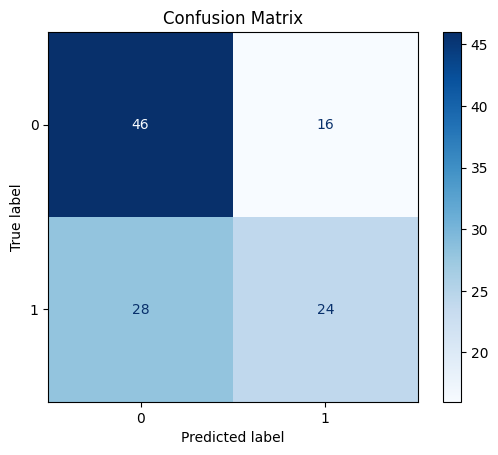

In [48]:
print("Turn Involved Label Validation")
evaluate_confusion_matrix(preprocess_turn.y_test, turn_best, preprocess_turn.X_test)

/tmp/ipykernel_624935/1009834419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersection_df['INTERSECTION_IND'] = training_df['INTERSECTION_IND'].apply(


Dataset has been split into training and testing sets.
Number of rows in total: 569
Number of rows in X_train: 455
Number of rows in X_test: 114
Number of Features/Terms in vector): 387
Min value: 0.0
Max value: 0.7746470435184668
Percentiles: [0.         0.         0.         0.11559978]
Explained Variance: 95.63%
Number of Components:  179


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/src/complete_collision.py:670: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balancer_eval = pd.concat(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

,Model,Balancer,Confusion Matrix,Macro Avg Precision,Macro Avg Recall,Macro Avg F1
0,LinearSVC,None,"[[0, 14], [1, 99]]",0.438053,0.495000,0.464789
1,RF,None,"[[0, 14], [0, 100]]",0.438596,0.500000,0.467290
2,LinearSVC,RandomOverSampler(random_state=123),"[[4, 10], [20, 80]]",0.527778,0.542857,0.526316
3,RF,RandomOverSampler(random_state=123),"[[1, 13], [1, 99]]",0.691964,0.530714,0.529481
4,LinearSVC,SMOTE(random_state=123),"[[4, 10], [19, 81]]",0.532011,0.547857,0.532192
5,RF,SMOTE(random_state=123),"[[0, 14], [0, 100]]",0.438596,0.500000,0.467290
6,LinearSVC,ADASYN(random_state=123),"[[4, 10], [18, 82]]",0.536561,0.552857,0.538194
7,RF,ADASYN(random_state=123),"[[0, 14], [0, 100]]",0.438596,0.500000,0.467290
8,LinearSVC,SVMSMOTE(random_state=123),"[[1, 13], [9, 91]]",0.487500,0.490714,0.487745
9,RF,SVMSMOTE(random_state=123),"[[0, 14], [0, 100]]",0.438596,0.500000,0.467290


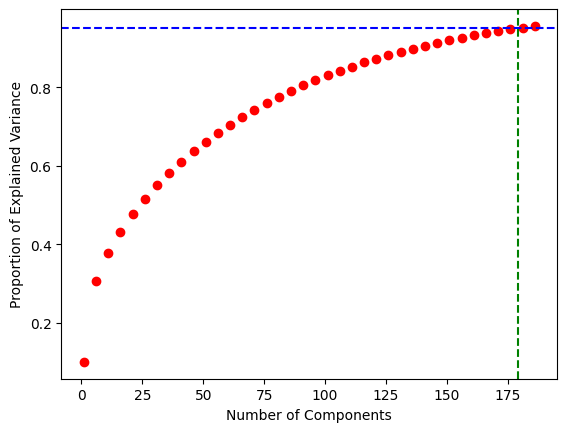

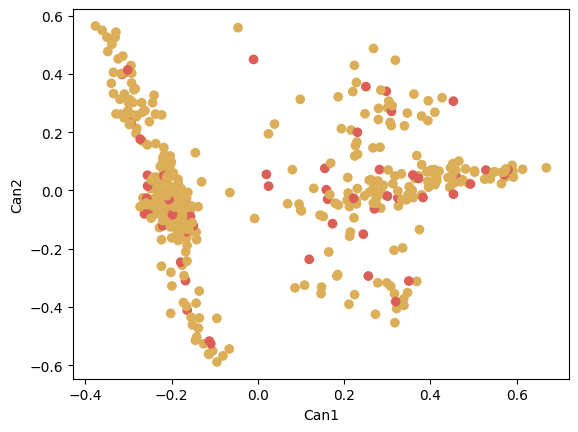

In [38]:
intersection_df = training_df[training_df['INTERSECTION_IND'].notnull() & training_df['INTERSECTION_IND'] !=0]
intersection_df['INTERSECTION_IND'] = training_df['INTERSECTION_IND'].apply(
    lambda x: 0 if x in ['N'] else 1
)
preprocess_intersection = cc.PreprocessGCAT(df=intersection_df, 
                                               text_column='concatenated_text', 
                                               label_column='INTERSECTION_IND',
                                               test_size=0.2, 
                                               norm = 'l2', 
                                               vocabulary=None, 
                                               min_df=0.05, 
                                               max_df=0.9, 
                                               max_features=500
                                               ) 
preprocess_intersection.fit_and_evaluate_tfidf_vector()
dtm = preprocess_intersection.create_doc_term_matrix()
explained_variance, components = preprocess_intersection.pca_analysis(dtm)
balancer_eval_intersection = preprocess_intersection.evaluate_balancers(models, class_balancers, n_components=components)
balancer_eval_intersection

Fitting 10 folds for each of 6 candidates, totalling 60 fits


/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Rec

Best parameters: {'classifier__C': 10, 'classifier__loss': 'hinge'}
Best cross-validation score: 0.8816066300723856
F1 score:  0.7824187277027298


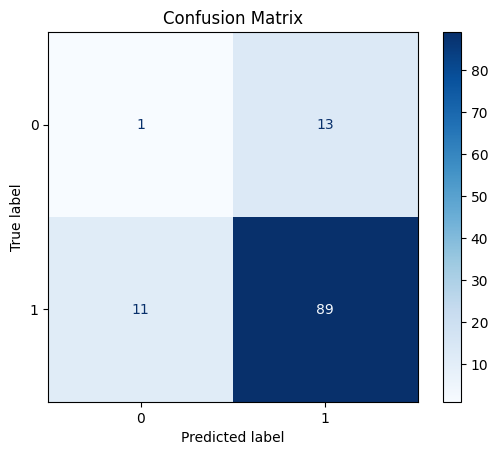

In [39]:
pipe_intersection = Pipeline([
    ('vec', preprocess_intersection.vec),
    ('class_balancer', SVMSMOTE(random_state=123)),
    ('pca', PCA(n_components=components)), 
    ('classifier', LinearSVC(random_state=123))
])

parameters = [
    {
        'classifier__C': [10, 25, 100],
        'classifier__loss': ['hinge', 'squared_hinge'],
    }
]

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_search_intersection = GridSearchCV(pipe_intersection, parameters, cv=kf, scoring='f1', verbose=1)
grid_search_intersection.fit(preprocess_intersection.X_train, preprocess_intersection.y_train)

print("Best parameters:", grid_search_intersection.best_params_)
print("Best cross-validation score:", grid_search_intersection.best_score_)
intersection_best =  grid_search_intersection.best_estimator_

Intersection Label Validation
F1 score:  0.7824187277027298
ROC AUC score:  0.48071428571428576
              precision    recall  f1-score   support

           0       0.08      0.07      0.08        14
           1       0.87      0.89      0.88       100

    accuracy                           0.79       114
   macro avg       0.48      0.48      0.48       114
weighted avg       0.78      0.79      0.78       114



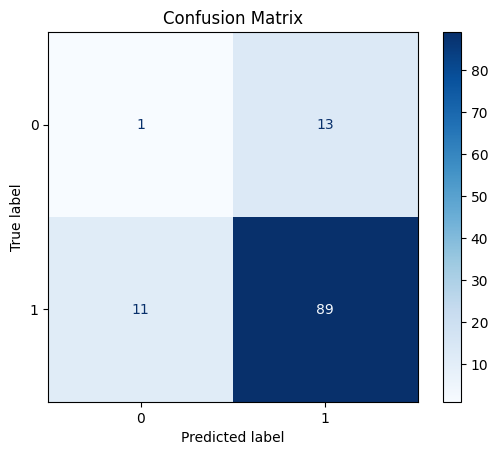

In [47]:
print("Intersection Label Validation")
evaluate_confusion_matrix(preprocess_intersection.y_test, intersection_best, preprocess_intersection.X_test)

In [341]:
training_df['SEVERITY_PRED'] = severity_best.predict(training_df['concatenated_text'])
training_df['SEVERITY_PRED'].value_counts()

SEVERITY_PRED
0    1879
1     295
Name: count, dtype: int64

In [342]:
training_df['TURN_PRED'] = turn_best.predict(training_df['concatenated_text'])
training_df['TURN_PRED'].value_counts()

TURN_PRED
0    1464
1     710
Name: count, dtype: int64

In [343]:
training_df['INTERSECTION_PRED'] = intersection_best.predict(training_df['concatenated_text'])
training_df['INTERSECTION_PRED'].value_counts()

INTERSECTION_PRED
1    1899
0     275
Name: count, dtype: int64

In [344]:
training_df['U1_IS_VEH_PRED'] = u1_is_veh_best.predict(training_df['concatenated_text'])
training_df['U1_IS_VEH_PRED'].value_counts()

U1_IS_VEH_PRED
1.0    1645
0.0     529
Name: count, dtype: int64

In [345]:
GCAT_pred_df = training_df

In [346]:
import numpy as np

GCAT_pred_df['SEVERITY_PRED_TEXT'] = GCAT_pred_df['SEVERITY_PRED'].replace({
    0: '',
    1: 'SEVERE INJURY',
})
GCAT_pred_df['INTERSECTION_PRED_TEXT'] = GCAT_pred_df['INTERSECTION_PRED'].replace({
    0: '',
    1: 'AT INTERSECTION',
})
GCAT_pred_df['TURN_PRED_TEXT'] = GCAT_pred_df['TURN_PRED'].replace({
    0: '',
    1: 'TURN INVOLVED',
})
GCAT_pred_df['GCAT_PRED_TEXT'] = GCAT_pred_df['SEVERITY_PRED_TEXT'] + ' ' + GCAT_pred_df['INTERSECTION_PRED_TEXT'] + ' ' + GCAT_pred_df['TURN_PRED_TEXT']
GCAT_pred_df['GCAT_PRED_TEXT'] = GCAT_pred_df['GCAT_PRED_TEXT'].apply(lambda x: 'NONE' if x.strip() == '' else x)
GCAT_pred_df['concatenated_text'] = GCAT_pred_df['concatenated_text'] + '\n\n GCAT INDICATORS: ' + GCAT_pred_df['GCAT_PRED_TEXT']

In [347]:
# GCAT_pred_df[['concatenated_text','BIKE_CLE_TEXT']].to_csv(os.path.join(data_dir, "processed", "GCAT_pred_df.csv"), index=False)